# 實現PCA演算法

## 建立測試資料:兩份資料，3個特徵，各20筆。

In [1]:
import numpy as np

# 固定隨機種子
np.random.seed(2342347)

# 第一個類別
mu_vec1 = np.array([0, 0, 0])  # 平均數
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # 共變異矩陣
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T

# 第二個類別
mu_vec2 = np.array([1, 1, 1])  # 平均數
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # 共變異矩陣
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

class1_sample.shape, class2_sample.shape

((3, 20), (3, 20))

## 繪圖

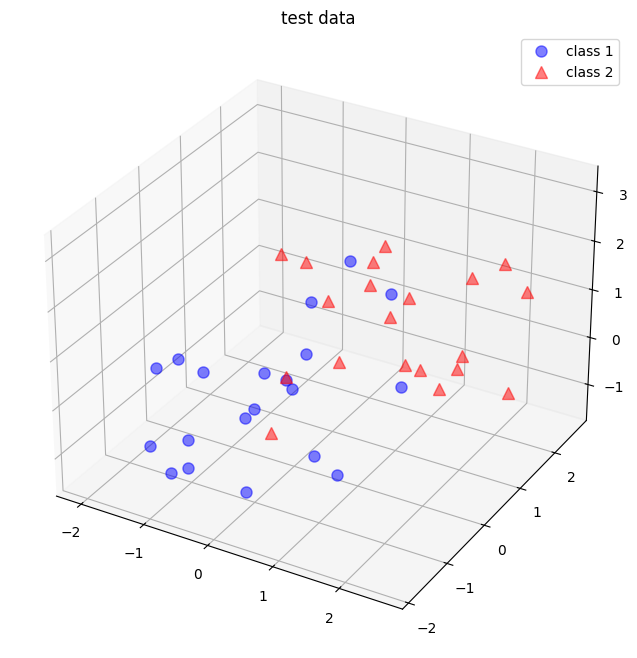

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
plt.rcParams["legend.fontsize"] = 10
ax.plot(
    class1_sample[0, :],
    class1_sample[1, :],
    class1_sample[2, :],
    "o",
    markersize=8,
    color="blue",
    alpha=0.5,
    label="class 1",
)
ax.plot(
    class2_sample[0, :],
    class2_sample[1, :],
    class2_sample[2, :],
    "^",
    markersize=8,
    alpha=0.5,
    color="red",
    label="class 2",
)

plt.title("test data")
ax.legend(loc="upper right")

plt.show()

## 合併資料

In [3]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
all_samples.shape

(3, 40)

## 計算共變異數矩陣(covariance matrix)

In [4]:
cov_mat = np.cov([all_samples[0, :], all_samples[1, :], all_samples[2, :]])
print("共變異數矩陣:\n", cov_mat)

共變異數矩陣:
 [[1.36790829 0.5946331  0.55037625]
 [0.5946331  1.35388385 0.450125  ]
 [0.55037625 0.450125   1.31086216]]


## 計算特徵向量(eigenvector)及對應的特徵值(eigenvalue, λ)

In [5]:
# 計算特徵值(eigenvalue)及對應的特徵向量(eigenvector)
eig_val_sc, eig_vec_sc = np.linalg.eig(cov_mat)

print("特徵向量:\n", eig_vec_sc)
print("特徵值:\n", eig_val_sc)

特徵向量:
 [[ 0.6131328   0.78845466 -0.04906558]
 [ 0.57507225 -0.48805716 -0.65657606]
 [ 0.54162726 -0.37435206  0.75266224]]
特徵值:
 [2.4118188  0.73851328 0.88232222]


## 繪製特徵向量

Text(0.5, 0, 'z_values')

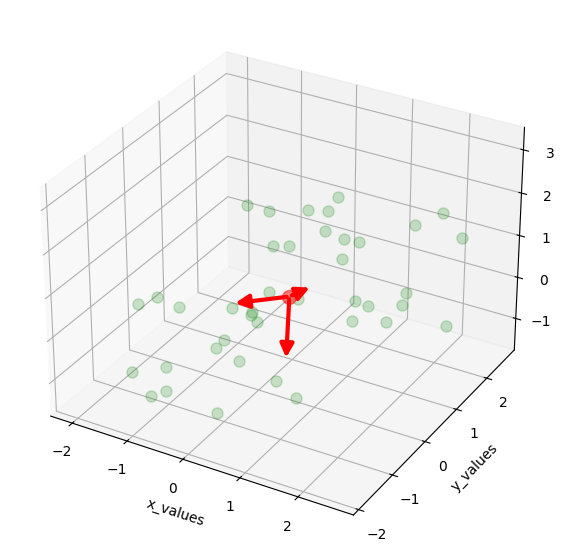

In [8]:
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch


# 繪製箭頭
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)


# 設定 3D 繪圖
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="3d")

# 繪製特徵向量
ax.plot(
    all_samples[0, :],
    all_samples[1, :],
    all_samples[2, :],
    "o",
    markersize=8,
    color="green",
    alpha=0.2,
)
[mean_x, mean_y, mean_z] = np.mean(all_samples, axis=1)
ax.plot([mean_x], [mean_y], [mean_z], "o", markersize=10, color="red", alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D(
        [mean_x, v[0]],
        [mean_y, v[1]],
        [mean_z, v[2]],
        mutation_scale=20,
        lw=3,
        arrowstyle="-|>",
        color="r",
    )
    ax.add_artist(a)
ax.set_xlabel("x_values")
ax.set_ylabel("y_values")
ax.set_zlabel("z_values")

## 合併特徵向量及特徵值，針對特徵值降冪排序，挑出前2名。

In [9]:
# 合併特徵向量及特徵值
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:, i]) for i in range(len(eig_val_sc))]

# 針對特徵值降冪排序
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# 挑出前2名
for i in eig_pairs[:2]:
    print(i[1])

[0.6131328  0.57507225 0.54162726]
[-0.04906558 -0.65657606  0.75266224]


## 座標轉換矩陣

In [10]:
matrix_w = np.stack((eig_pairs[0][1], eig_pairs[1][1]), axis=1)
print("Matrix W:\n", matrix_w)

Matrix W:
 [[ 0.6131328  -0.04906558]
 [ 0.57507225 -0.65657606]
 [ 0.54162726  0.75266224]]


## 原始資料乘以轉換矩陣，得到主成分

In [11]:
transformed = matrix_w.T.dot(all_samples)
transformed.shape

(2, 40)

## 繪製轉換後的資料

Text(0.5, 1.0, 'Transformed samples with class labels')

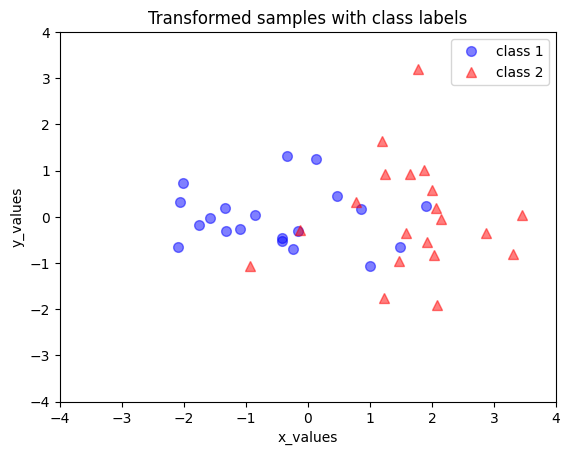

In [12]:
plt.plot(
    transformed[0, 0:20],
    transformed[1, 0:20],
    "o",
    markersize=7,
    color="blue",
    alpha=0.5,
    label="class 1",
)
plt.plot(
    transformed[0, 20:40],
    transformed[1, 20:40],
    "^",
    markersize=7,
    color="red",
    alpha=0.5,
    label="class 2",
)
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.xlabel("x_values")
plt.ylabel("y_values")
plt.legend()
plt.title("Transformed samples with class labels")

## 降維至2個特徵，分類結果稍差，但不離譜。